In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
kr=pd.read_csv("Inside_airbnb_NYC_dataset.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# New section

how does availability vary in the neighbourhood


In [4]:
kr['neighbourhood_group'].value_counts()

Manhattan        16781
Brooklyn         14716
Queens            5323
Bronx             1104
Staten Island      353
Name: neighbourhood_group, dtype: int64

In [5]:
kr['room_type'].value_counts()

Entire home/apt    20397
Private room       17098
Shared room          572
Hotel room           210
Name: room_type, dtype: int64

In [6]:
kr.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,11/4/2019,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,10/22/2021,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,6/5/2016,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,8/8/2021,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,11/8/2021,3.68,1,192,33,NaN


In [7]:
kr.shape

(38277, 18)

In [8]:
kr.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [9]:
kr.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                            34
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9504
reviews_per_month                  9504
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           38276
dtype: int64

In [10]:
kr.drop('license',axis=1,inplace=True) 
kr.drop('last_review',axis=1,inplace=True)
kr.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                           34
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9504
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [11]:
kr.drop_duplicates()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,48,0.33,3,338,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.684940,-73.957650,Entire home/apt,75,1,409,4.86,1,194,32
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,0.52,2,365,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,5,2,0.02,1,123,1
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,507,3.68,1,192,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,53662330,"HUGE PRIVATE ROOM, AWESOME LOCATION",100146245,Serin,Staten Island,Port Richmond,40.632222,-74.136715,Private room,79,1,0,NaN,6,359,0
38273,53662542,"LARGE PRVT ROOM, QUIET RESIDENCE PERFECTLOCATION",100146245,Serin,Staten Island,Port Richmond,40.630502,-74.136142,Private room,76,1,0,NaN,6,359,0
38274,53662772,King Room - Midtown Manhattan,337879004,Sinem,Manhattan,Midtown,40.753887,-73.980536,Private room,116,1,0,NaN,13,11,0
38275,53663081,King Room - Bryant Park.,337879004,Sinem,Manhattan,Midtown,40.755569,-73.981976,Private room,106,1,0,NaN,13,3,0


In [12]:
kr.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                           34
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9504
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [13]:
data=kr.dropna()

In [14]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [15]:
data.shape

(28747, 16)

In [16]:
kr['host_name'].value_counts()

June              431
Blueground        308
Michael           307
Karen             286
David             235
                 ... 
Sam And Masha       1
Giada               1
Deeksha             1
Simon & Jessie      1
Maxinne             1
Name: host_name, Length: 9123, dtype: int64

In [17]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.874700e+04,2.874700e+04,28747.000000,28747.000000,28747.000000,28747.000000,28747.000000,28747.000000,28747.000000,28747.000000,28747.000000
mean,2.732305e+07,1.057712e+08,40.727828,-73.947488,161.656660,18.923749,30.996695,1.722088,9.395798,128.236059,6.697325
std,1.690532e+07,1.244503e+08,0.056436,0.051857,271.149485,25.628061,56.038386,4.401544,31.878020,138.932583,16.620953
min,2.595000e+03,2.438000e+03,40.504560,-74.249840,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.223253e+07,1.010881e+07,40.687515,-73.982540,70.000000,2.000000,3.000000,0.120000,1.000000,0.000000,0.000000
50%,2.714119e+07,4.537660e+07,40.722700,-73.953770,115.000000,30.000000,9.000000,0.480000,1.000000,69.000000,1.000000
75%,4.304470e+07,1.678301e+08,40.762300,-73.929110,180.000000,30.000000,32.000000,1.780000,3.000000,276.000000,6.000000
max,5.364807e+07,4.344080e+08,40.913100,-73.710870,10000.000000,1250.000000,1009.000000,141.000000,421.000000,365.000000,669.000000


In [18]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.602007,-0.003356,0.108250,0.048138,-0.220280,-0.284123,0.231693,0.178001,0.183561,0.148899
host_id,0.602007,1.000000,0.027384,0.129442,0.040767,-0.167716,-0.112020,0.208454,0.104374,0.223654,0.170436
latitude,-0.003356,0.027384,1.000000,0.059352,0.021884,0.044234,-0.043365,-0.036662,0.059169,0.002442,-0.046931
longitude,0.108250,0.129442,0.059352,1.000000,-0.115615,-0.091135,0.063314,0.071078,-0.077738,0.140408,0.062889
price,0.048138,0.040767,0.021884,-0.115615,1.000000,-0.032801,-0.025684,0.008279,0.006346,0.083424,0.017866
minimum_nights,-0.220280,-0.167716,0.044234,-0.091135,-0.032801,1.000000,-0.141668,-0.188965,0.017478,-0.089697,-0.235962
number_of_reviews,-0.284123,-0.112020,-0.043365,0.063314,-0.025684,-0.141668,1.000000,0.277291,-0.094964,0.142521,0.551125
reviews_per_month,0.231693,0.208454,-0.036662,0.071078,0.008279,-0.188965,0.277291,1.000000,0.011443,0.142453,0.593884
calculated_host_listings_count,0.178001,0.104374,0.059169,-0.077738,0.006346,0.017478,-0.094964,0.011443,1.000000,0.132111,-0.006995
availability_365,0.183561,0.223654,0.002442,0.140408,0.083424,-0.089697,0.142521,0.142453,0.132111,1.000000,0.168336


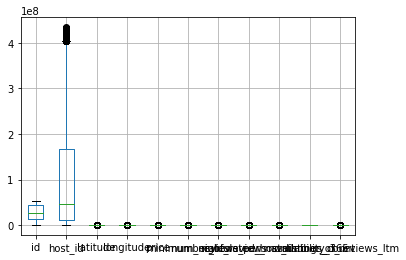

In [19]:
data.boxplot()

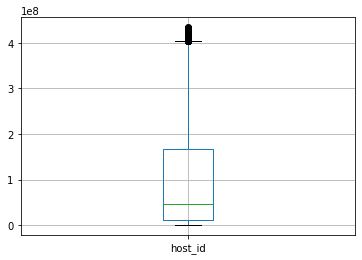

In [20]:
data.boxplot(["host_id"])

In [21]:
kr.to_csv('aitfinal_final_assignment.csv')

In [22]:
#What is the price of the Airbnb’s in different Neighborhood?

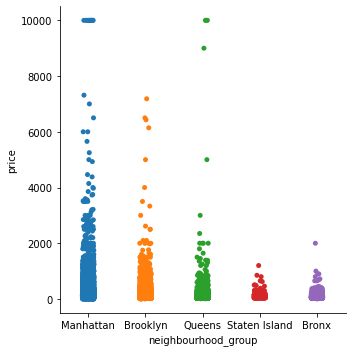

In [23]:
g = sns.catplot(x="neighbourhood_group", y="price", data=kr)

In [24]:
kr1=kr.groupby('neighbourhood_group').sum()['availability_365']
kr1=kr1.reset_index()

In [25]:
## neighbourhood_group and their availability 

Text(0.5, 1.0, 'Neighbourhood_group and their availability')

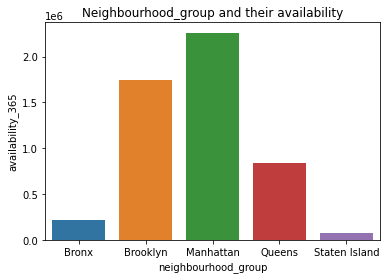

In [26]:
k=sns.barplot(x='neighbourhood_group',y='availability_365',data=kr1)
k.set_title('Neighbourhood_group and their availability')
